In [3]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [5]:
print(X.shape,Y.shape)

(500, 2) (500,)


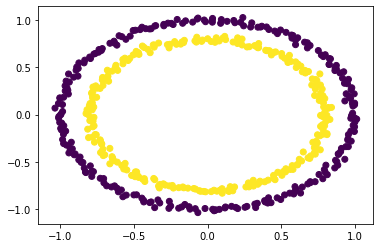

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [7]:
def func(X):
    # Non-Linear Transformation
    #x3=x1^2+x2^2
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,:-1]=X
    X_[:,-1]=X3
    return X_

In [8]:
X_=func(X)

(500, 3)


In [9]:
def plot3D(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax.scatter(X1,X2,X3,zdir='Z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax

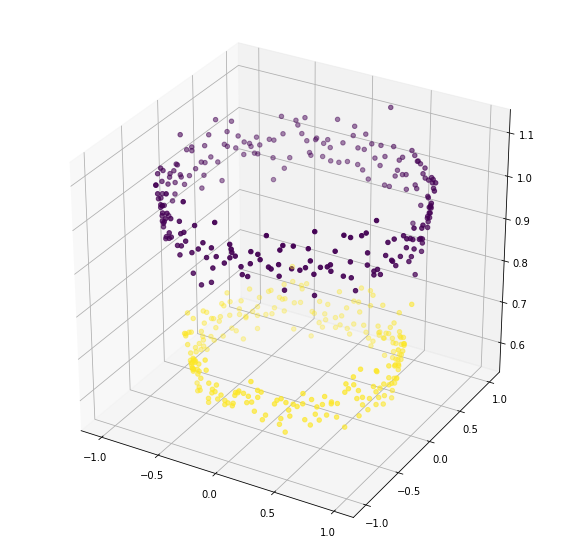

In [10]:
ax=plot3D(X_)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
lr=LogisticRegression()

In [13]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy (2D) %.4f"%(acc*100))

Accuracy (2D) 44.6000


C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [14]:
# Projecting Data to higher dimension

In [15]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy (3D) %.4f"%(acc*100))

Accuracy (3D) 100.0000


C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [16]:
# Visualise the Decision Surface

In [17]:
lr.fit(X_,Y)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
wts=lr.coef_

In [19]:
wts

array([[ 4.47912421e-03, -2.75537550e-02, -8.88085273e+00]])

In [20]:
bias=lr.intercept_
bias

array([7.1930046])

In [21]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [22]:
z=-(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2] # ax+by+cz+d=0  z=-(ax+by+d)/c
print(z)

[[0.81514175 0.81564611 0.81615047 0.81665483]
 [0.81203915 0.81254351 0.81304787 0.81355222]
 [0.80893655 0.80944091 0.80994526 0.81044962]
 [0.80583395 0.8063383  0.80684266 0.80734702]]


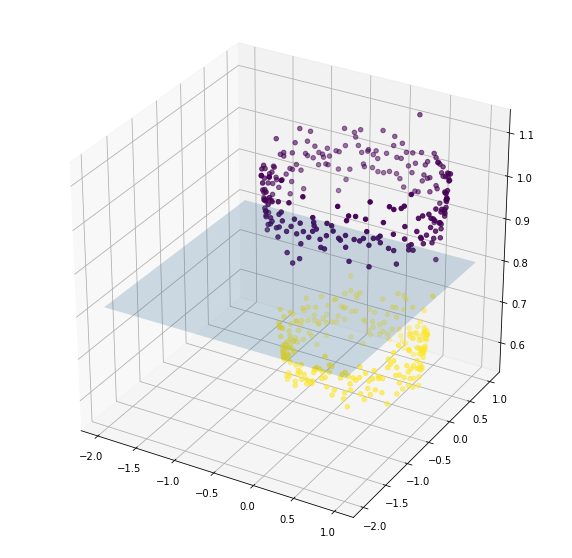

In [23]:
ax = plot3D(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

In [24]:
# Using Kernels

# Linear kernel
# Polynomial Kernel
# RBF(Radial Bias Function) kernel
# Sigmoid Kernel

In [26]:
from sklearn import svm
svc=svm.SVC(kernel='linear')
svc.fit(X,Y)
svc.score(X,Y)

0.508

In [27]:
svc=svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.542

In [28]:
svc=svm.SVC(kernel='rbf')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [29]:
svc=svm.SVC(kernel='sigmoid')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.504

In [30]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0